# Assignment module 6

### Package import

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

### Data import

In [2]:
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
#data_df.head()

### Data preparation

In [3]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [4]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
#print(vectorized_day_dataset)
#print(vectorized_day_dataset.shape)

In [5]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))

number of days with missing value: 28


In [6]:
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

(337, 288)


### Finding the optimal kernel PCA model for the data set

Load and inspect the dataset:

In [7]:
data = pd.DataFrame(vectorized_day_dataset_no_nans)
data.head()  # Display the first few rows
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,33.314540,32.985163,32.566766,31.771513,31.545994,29.896142,28.798220,27.673591,26.836795,26.332344,...,44.919881,45.931751,44.670623,42.902077,40.703264,39.501484,37.543027,36.169139,35.952522,33.753709
std,15.895554,15.590837,15.211089,15.052824,14.602423,14.448942,14.522794,13.478609,13.888804,13.761443,...,19.550670,19.604682,18.469283,18.352514,18.369741,18.716577,17.610673,17.948285,18.085877,16.511590
min,5.000000,8.000000,6.000000,3.000000,6.000000,7.000000,6.000000,7.000000,3.000000,8.000000,...,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,22.000000,22.000000,22.000000,20.000000,21.000000,19.000000,18.000000,19.000000,17.000000,17.000000,...,31.000000,31.000000,32.000000,30.000000,29.000000,26.000000,24.000000,23.000000,23.000000,22.000000
50%,29.000000,29.000000,29.000000,29.000000,28.000000,26.000000,26.000000,25.000000,23.000000,23.000000,...,43.000000,44.000000,42.000000,41.000000,38.000000,36.000000,34.000000,32.000000,33.000000,31.000000
75%,41.000000,42.000000,40.000000,40.000000,39.000000,38.000000,36.000000,34.000000,32.000000,32.000000,...,58.000000,59.000000,55.000000,54.000000,50.000000,48.000000,46.000000,45.000000,46.000000,42.000000
max,101.000000,83.000000,92.000000,81.000000,83.000000,78.000000,73.000000,109.000000,91.000000,121.000000,...,107.000000,101.000000,103.000000,104.000000,103.000000,115.000000,101.000000,130.000000,129.000000,117.000000


Standardize the data:

In [8]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

Fit the kernel PCA models and find summary statistcs for the reconstruction error with each model:

In [9]:
kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']

df_kernel_pca_results = pd.DataFrame()
for i in kernel_list:
    kpca = KernelPCA(kernel=i, n_components=10, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(X_normalized)
    X_reconstructed = kpca.inverse_transform(X_kpca)
    reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)
    df_kernel_pca_results[i] = reconstruction_error
    
df_kernel_pca_results.describe()

,linear,rbf,poly,sigmoid
count,337.000000,337.000000,3.370000e+02,337.000000
mean,0.213094,0.426757,2.529534e-01,0.497852
std,0.105833,0.770605,1.718463e-01,0.446031
min,0.083846,0.124759,6.876123e-10,0.145080
25%,0.138327,0.177562,1.536634e-01,0.312102
50%,0.173123,0.237592,1.997788e-01,0.388091
75%,0.262098,0.379077,2.971163e-01,0.532215
max,0.692111,7.095401,1.340556e+00,4.146123


### Baseline PCA model

Load the dataset again into a DataFrame:

In [10]:
data_base = pd.DataFrame(vectorized_day_dataset_no_nans)

Standardize the data:

In [11]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_base)
#data_normalized

Fit the PCA transform model, calculate the reconstruction error and compare with kernel PCA models:

In [12]:
pca = PCA(n_components=10)  # Adjust the number of components (dimensions) as needed
data_pca = pca.fit_transform(data_normalized)
pca_reconstructed = pca.inverse_transform(data_pca)
reconstruction_error_pca = np.mean(np.square(data_normalized - pca_reconstructed), axis=1)

df_kernel_pca_results["PCA"] = reconstruction_error_pca   
df_kernel_pca_results.describe()


,linear,rbf,poly,sigmoid,PCA
count,337.000000,337.000000,3.370000e+02,337.000000,337.000000
mean,0.213094,0.426757,2.529534e-01,0.497852,0.213094
std,0.105833,0.770605,1.718463e-01,0.446031,0.105833
min,0.083846,0.124759,6.876123e-10,0.145080,0.083846
25%,0.138327,0.177562,1.536634e-01,0.312102,0.138327
50%,0.173123,0.237592,1.997788e-01,0.388091,0.173123
75%,0.262098,0.379077,2.971163e-01,0.532215,0.262098
max,0.692111,7.095401,1.340556e+00,4.146123,0.692111


Assess the PCA model with the explained variance ratio:

In [13]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')
print(sum(explained_variance))

Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
0.7869064977482033


Stability analysis:

In [14]:
num_runs = 10  # Number of times to run PCA with different random seeds

prop_data_used = 0.8 # Define the proportion of data to use in each iteration (e.g., 80%)

for i in range(num_runs):
    # Randomly select a subset of the data
    prop_data_used
    subset_indices = np.random.choice(data_base.shape[0], size=int(prop_data_used * data_base.shape[0]), replace=False)
    subset_data = data_base.loc[subset_indices]
    # Fit PCA on the subset
    pca = PCA(n_components=10)  # Change random_state for each run
    X_pca = pca.fit_transform(subset_data)
    
    explained_variance = pca.explained_variance_ratio_
    print(f'Run {i+1} - Explained Variance Ratio: {explained_variance}')

Run 1 - Explained Variance Ratio: [0.47369756 0.15849567 0.08711778 0.04686554 0.02320975 0.02266584
 0.01382631 0.01221682 0.01077637 0.00902694]
Run 2 - Explained Variance Ratio: [0.50177772 0.13530229 0.08228354 0.04658337 0.02299287 0.02247112
 0.01391738 0.01259265 0.01005036 0.00878583]
Run 3 - Explained Variance Ratio: [0.50788343 0.13299226 0.07574785 0.04841855 0.02595031 0.02003242
 0.0137655  0.01176733 0.00989835 0.00918958]
Run 4 - Explained Variance Ratio: [0.5008952  0.13479954 0.08621678 0.04688236 0.02279695 0.02071595
 0.01369227 0.01255675 0.01072285 0.00889272]
Run 5 - Explained Variance Ratio: [0.49531268 0.13934703 0.08284148 0.0429951  0.02369344 0.02324904
 0.0143492  0.01332966 0.0104471  0.00897057]
Run 6 - Explained Variance Ratio: [0.49192865 0.13242282 0.07630275 0.04936239 0.02790919 0.02323954
 0.01468175 0.01261487 0.01041482 0.00946167]
Run 7 - Explained Variance Ratio: [0.49207948 0.13607955 0.07675853 0.05041964 0.0248544  0.02346216
 0.01420956 0.013

Plot for the number of components:

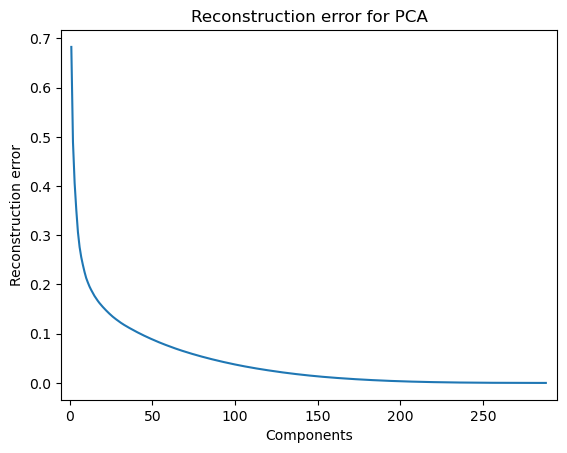

In [15]:
y_axis_plot = []
for i in range(1, 289):
    pca_plot = PCA(n_components=i)
    data_pca_plot = pca_plot.fit_transform(data_normalized)
    pca_reconstructed_plot = pca_plot.inverse_transform(data_pca_plot)
    reconstruction_error_pca_plot = np.mean(np.square(data_normalized - pca_reconstructed_plot), axis=1)
    y_axis_plot.append(np.mean(reconstruction_error_pca_plot))

plt.plot(range(1, 289), y_axis_plot)
plt.title('Reconstruction error for PCA')
plt.xlabel('Components')
plt.ylabel('Reconstruction error')
plt.xlim(-5,295)
plt.show()   